In [3]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
def parse(line):
    day_str, time_str, height_str = line.split()

    day = int(day_str)
    hour_str, minute_str = time_str.split(":")
    hour_temp = float(hour_str)
    minute = int(minute_str)

    hour = hour_temp + (day * 24) + (minute/60)

    height = float(height_str)

    return hour, height

Mean (mu) = 2.478 ft
Std dev (sigma) = 2.381 ft
2-ft increase = 0.840 sigma (i.e. 2/sigma)
Resulting tide = 7.33 ft -> z = 2.038 sigma


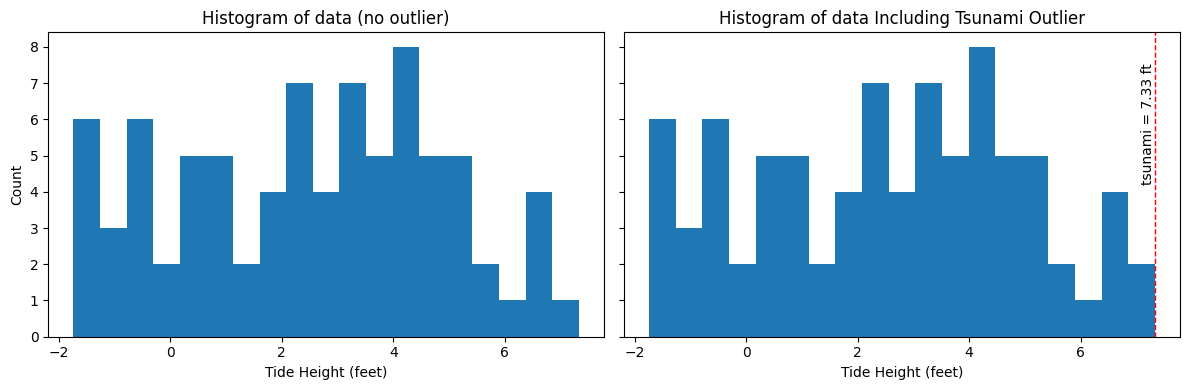

In [5]:
hour_array = []
height_array = []

file = open('ASTR19_F25_group_project_data.txt','r')

file.readline()
file.readline()
file.readline()

for line in file:
    if line.strip() == "":
        continue
    day_str, time_str, height_str = line.split()
    height = float(height_str)
    height_array.append(height)

height_array = np.array(height_array)

sigma = np.std(height_array, ddof=0)
mu = np.mean(height_array)

orig_high_jan14 = 5.33
tsunami_increase = 2.0
tsunami_value = orig_high_jan14 + tsunami_increase   

increase_in_sigma = tsunami_increase / sigma
z_of_result = (tsunami_value - mu) / sigma

print(f"Mean (mu) = {mu:.3f} ft")
print(f"Std dev (sigma) = {sigma:.3f} ft")
print(f"2-ft increase = {increase_in_sigma:.3f} sigma (i.e. 2/sigma)")
print(f"Resulting tide = {tsunami_value:.2f} ft -> z = {z_of_result:.3f} sigma")

heights_with_outlier = np.append(height_array, tsunami_value)

min_edge = min(height_array.min(), heights_with_outlier.min())
max_edge = max(height_array.max(), heights_with_outlier.max())
bins = np.linspace(min_edge, max_edge, 20)

fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)

axes[0].hist(height_array, bins=bins)
axes[0].set_title("Histogram of data (no outlier)")
axes[0].set_xlabel("Tide Height (feet)")
axes[0].set_ylabel("Count")

axes[1].hist(heights_with_outlier, bins=bins)
axes[1].axvline(tsunami_value, color='r', linestyle='--', linewidth=1)
axes[1].text(tsunami_value, 0.9*axes[1].get_ylim()[1],
             f"tsunami = {tsunami_value:.2f} ft", rotation=90, va='top', ha='right')
axes[1].set_title("Histogram of data Including Tsunami Outlier")
axes[1].set_xlabel("Tide Height (feet)")

plt.tight_layout()
plt.show()


Mean height (mu): 2.4782926829268295
Standard dev (sigma): 2.38064082624931


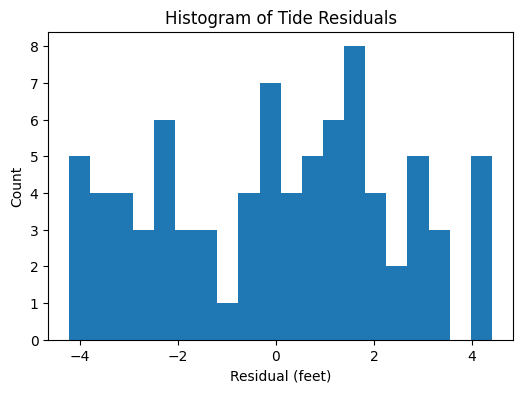

Tsunami tides (feet): 7.33
Residual of tsunami points: 4.851707317073171
Tsunami is 2.037983749407934 standard deviations above the mean


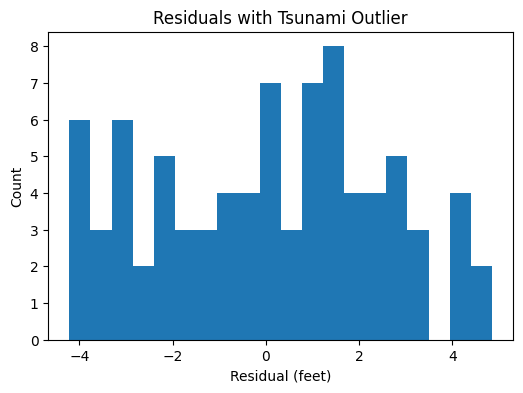

In [10]:
heights = np.array(height_array)  

mu = np.mean(heights)
sigma = np.std(heights)

residuals = heights - mu

print("Mean height (mu):", mu)
print("Standard dev (sigma):", sigma)

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=20)
plt.xlabel("Residual (feet)")
plt.ylabel("Count")
plt.title("Histogram of Tide Residuals")
plt.show()
tsunami_value = 7.33       
tsunami_residual = tsunami_value - mu
tsunami_sigma = tsunami_residual / sigma

print("Tsunami tides (feet):", tsunami_value)
print("Residual of tsunami points:", tsunami_residual)
print("Tsunami is", tsunami_sigma, "standard deviations above the mean")
residuals_with_outlier = np.append(residuals, tsunami_residual)

plt.figure(figsize=(6,4))
plt.hist(residuals_with_outlier, bins=20)
plt.xlabel("Residual (feet)")
plt.ylabel("Count")
plt.title("Residuals with Tsunami Outlier")
plt.show()
